<a href="https://colab.research.google.com/github/JideOkesanjo/JvwzPchMzoFGWGVY/blob/main/Apziva_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Term Deposit Marketing Campaign
The main objective of this project is to enhance the effectiveness of customer outreach. This project will harness the power of call center data to create a resilient machine learning model to accomplish this.
The model aims to optimise the success rate of calls made to customers, resulting in improved outcomes for products that customers might interested in.
A key element the project is ensure the model not only delivers high call success rates, but also provides interpretability. This interpretability empowers executives to make well informed decisions based on the machine learning model from this project.

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scikitplot.metrics import plot_lift_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

plt.style.use('fivethirtyeight')
%matplotlib inline

# Loading Data

In [ ]:
path = '/content/drive/MyDrive/Datasets /term-deposit-marketing-2020.csv'
df = pd.read_csv(path)

# Exploratory Data Analysis

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [ ]:
'The dataset has {row} rows and {column} columns'.format(row=df.shape[0], column=df.shape[1])

'The dataset has 40000 rows and 14 columns'

In [ ]:
df.isnull().any()


age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
y            False
dtype: bool

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y'],
      dtype='object')

In [ ]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
y            object
dtype: object

"Yes" and "No" in the target variable was changed to 0 for "No" and 1 for "Yes". This is to make modeling easier. One hot encoding will be used on the categorical and binary variables during preprocessing.

In [ ]:
df.nunique()

age            70
job            12
marital         3
education       4
default         2
balance      6849
housing         2
loan            2
contact         3
day            31
month          11
duration     1535
campaign       48
y               2
dtype: int64

There appears to be high rejection rates for a term deposits. Knowing why this is so could be valuable in knowing which people would be more likely to open a term deposit.

In [ ]:
df['y'] = df['y'].map({'no': 0, 'yes': 1})


In [ ]:
df.dtypes


age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
y             int64
dtype: object

In [ ]:
yes = df.loc[df['y'] == 1, 'age']
no = df.loc[df['y'] == 0, 'age']
fraction = len(no)/len(yes)
print('{.} percent of the customers opened a opened a term deposit'. format(fraction))

12.812154696132596 of the customers opened a opened a term deposit


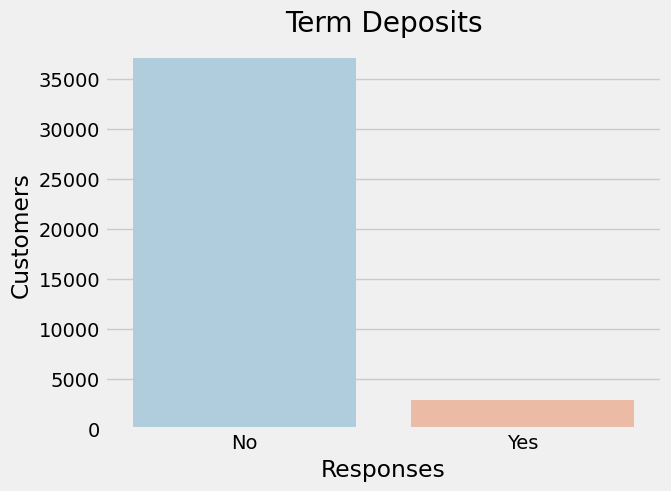

In [ ]:
ax = sns.countplot(x='y', data=df, palette='RdBu_r')
ax.set_title('Term Deposits')
plt.ylabel('Customers')
plt.xlabel('Responses')
ax.set_xticklabels(['No', 'Yes'])


plt.show()


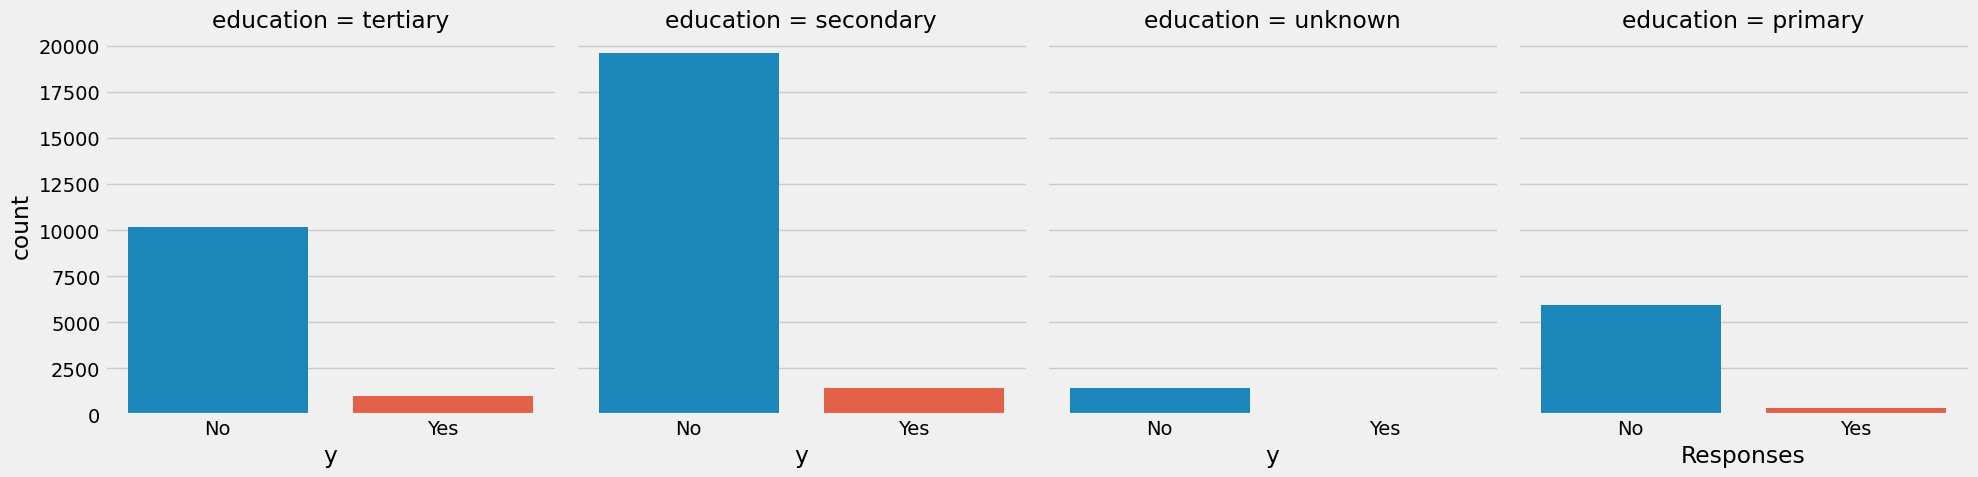

In [ ]:
ax = sns.catplot(x='y', col='education', data=df, kind='count')
ax.set_xticklabels(['No', 'Yes'])
plt.xlabel('Responses')
plt.ylabel('Customers')
plt.show()



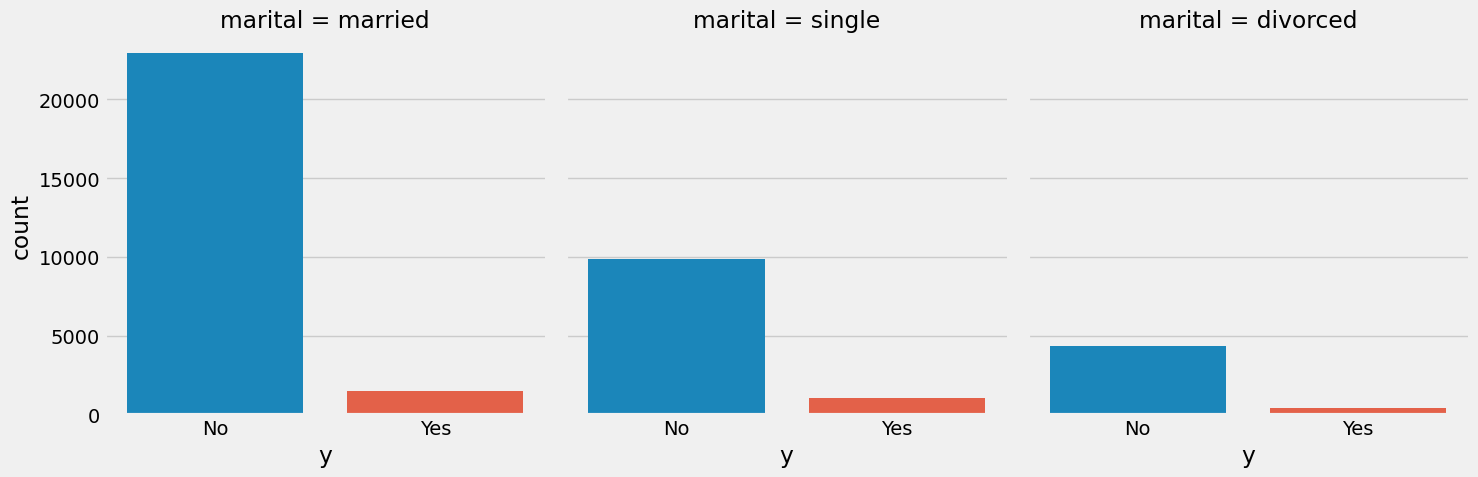

In [ ]:
ax = sns.catplot(x='y', col='marital', data=df, kind='count')
ax.set_xticklabels(['No', 'Yes'])
plt.show()


In [ ]:
age_yes = df.loc[df['y'] == 1, 'age']
age_no = df.loc[df['y'] == 0, 'age']

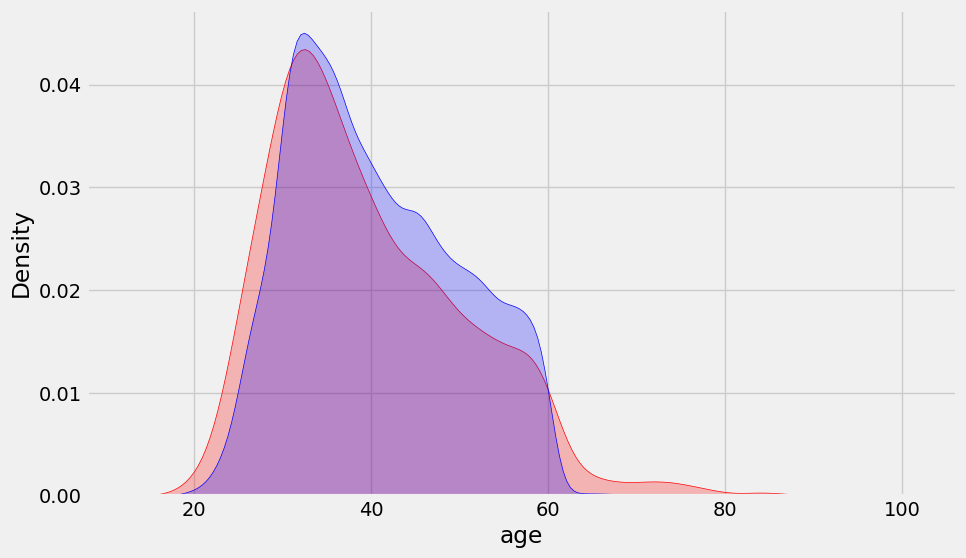

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.kdeplot(age_yes, fill=True, color='red')
ax = sns.kdeplot(age_no, fill=True, color='blue')
plt.show()

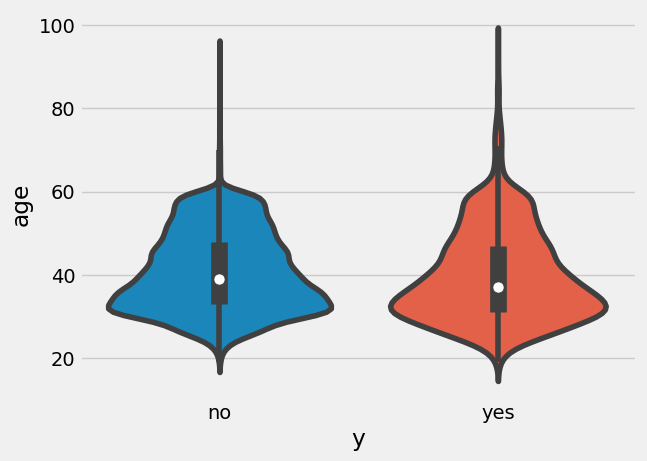

In [ ]:
ax = sns.violinplot(x='y', y='age', data=df)
ax.set_xticklabels(['no', 'yes'])
plt.show()



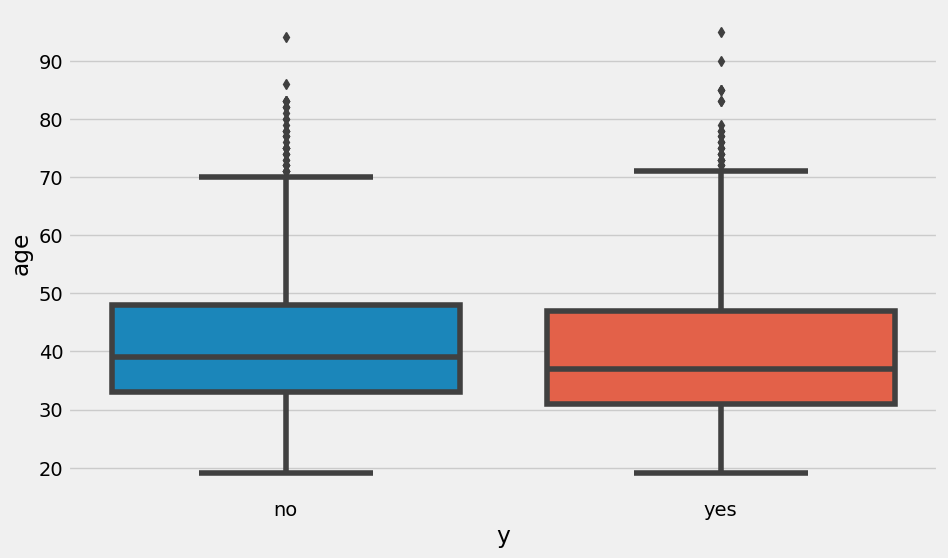

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='y', y='age', data=df)
ax.set_xticklabels(['no', 'yes'])
plt.show()




# Preprocessing

The features 'day', 'month' and 'duration' were removed from the data before modeling because it was impossible to know the day, month or length of the phone call to a potential customer until it was made in the future.

In [ ]:
df.drop(columns=['day', 'month', 'duration'], inplace=True)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,1,0


In [ ]:
df = pd.get_dummies(df, columns=['job', 'marital', 'education','default', 'housing', 'loan', 'contact'])

In [ ]:
df.head()

,age,balance,campaign,y,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown
0,58,2143,1,0,0,0,0,0,1,0,...,0,1,0,0,1,1,0,0,0,1
1,44,29,1,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,1
2,33,2,1,0,0,0,1,0,0,0,...,0,1,0,0,1,0,1,0,0,1
3,47,1506,1,0,0,1,0,0,0,0,...,1,1,0,0,1,1,0,0,0,1
4,33,1,1,0,0,0,0,0,0,0,...,1,1,0,1,0,1,0,0,0,1


In [ ]:
X = df.drop(columns=['y'])
y = df['y']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(30000, 31)
(10000, 31)
(30000,)
(10000,)


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)





Extreme Gradient Boosting Classifier

In [ ]:
learning_rates = np.arange(0.1, 1.1, 0.1)
for learning_rate in learning_rates:
    xgb = XGBClassifier(n_estimators=100, eta = learning_rate, random_state = 0)
    xgb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(xgb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(xgb.score(X_test, y_test)))
    print()

Learning rate:  0.1
Accuracy score (training): 0.930
Accuracy score (validation): 0.927

Learning rate:  0.2
Accuracy score (training): 0.931
Accuracy score (validation): 0.927

Learning rate:  0.30000000000000004
Accuracy score (training): 0.933
Accuracy score (validation): 0.927

Learning rate:  0.4
Accuracy score (training): 0.935
Accuracy score (validation): 0.926

Learning rate:  0.5
Accuracy score (training): 0.938
Accuracy score (validation): 0.926

Learning rate:  0.6
Accuracy score (training): 0.943
Accuracy score (validation): 0.923

Learning rate:  0.7000000000000001
Accuracy score (training): 0.946
Accuracy score (validation): 0.922

Learning rate:  0.8
Accuracy score (training): 0.950
Accuracy score (validation): 0.919

Learning rate:  0.9
Accuracy score (training): 0.952
Accuracy score (validation): 0.917

Learning rate:  1.0
Accuracy score (training): 0.960
Accuracy score (validation): 0.913



In [ ]:
xgb = XGBClassifier(n_estimators=100, eta = .2, random_state = 0)
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)



0.9274

In [ ]:
xgb_score = cross_validate(xgb, X_train, y_train, scoring='accuracy', cv=5)



In [ ]:
sorted(xgb_score.keys())
xgb_scores = pd.DataFrame(xgb_score)
xgb_scores

,fit_time,score_time,test_score
0,3.609111,0.015902,0.926833
1,7.613361,0.015482,0.927500
2,3.525205,0.021683,0.926833
3,4.681162,0.055039,0.927667
4,7.781556,0.030743,0.927000


# Lift Analysis for Extreme Gradient Boosting Classifier

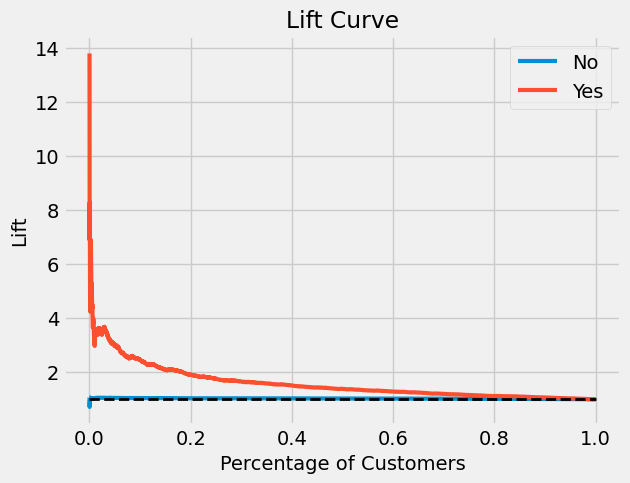

In [ ]:
plot_lift_curve(y_test, xgb.predict_proba(X_test))
plt.legend(labels=['No', 'Yes'])
plt.ylabel('Lift')
plt.xlabel('Percentage of Customers')
plt.show()

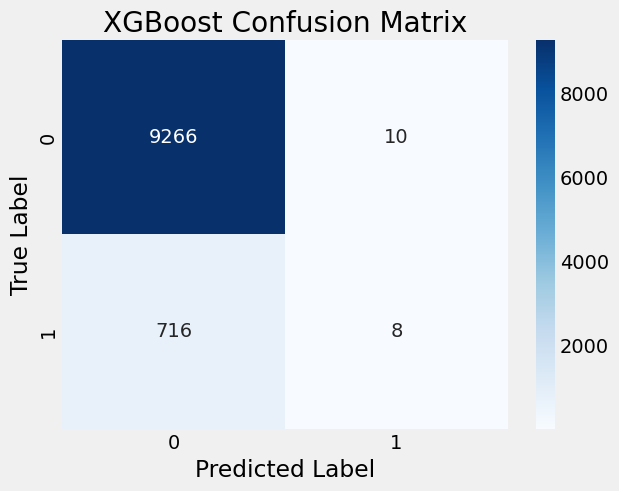

In [ ]:
confusion_matrix(y_test, xgb.predict(X_test))
sns.heatmap(confusion_matrix(y_test, xgb.predict(X_test)), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('XGBoost Confusion Matrix')
plt.show()



In [47]:
feature_imp = pd.DataFrame(sorted(zip(xgb.feature_importances_, X.columns)), columns=['Value', 'Feature'])
feature_imp.sort_values(by="Value", ascending=False, inplace=True)
feature_imp




,Value,Feature
30,0.182433,contact_unknown
29,0.073987,contact_cellular
28,0.045012,marital_married
27,0.037368,loan_no
26,0.036750,housing_no
25,0.032180,age
24,0.031706,education_unknown
23,0.030303,job_services
22,0.030159,balance
21,0.029913,education_tertiary


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, xgb.predict(X_test))


In [ ]:
from lightgbm import LGBMClassifier


In [ ]:
verbosity_lvl = 0
for learning_rate in learning_rates:
    lgb = LGBMClassifier(n_estimators=100, learning_rate=learning_rate, verbosity = verbosity_lvl, random_state = 0)
    lgb.fit(X_train, y_train)
    print(learning_rate)
    print("Accuracy score (training): {0:.3f}".format(lgb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(lgb.score(X_test, y_test)))
    print()


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012555 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
0.1
Accuracy score (training): 0.930
Accuracy score (validation): 0.927

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
0.2
Accuracy score (training): 0.933
Accuracy score (validation): 0.927

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011810 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
0.30000000000000004
Accuracy score (training): 0.937
Accuracy score (validation): 0.926

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of t

In [ ]:
lgb = LGBMClassifier(n_estimators=100, learning_rate = 0.1, random_state = 0)
lgb.fit(X_train, y_train)
lgb.score(X_test, y_test)





[LightGBM] [Info] Number of positive: 2172, number of negative: 27828
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029696 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 443
[LightGBM] [Info] Number of data points in the train set: 30000, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.072400 -> initscore=-2.550394
[LightGBM] [Info] Start training from score -2.550394


0.9275

In [ ]:
lgb_score = cross_validate(lgb, X_train, y_train, scoring=scoring, cv=5)
sorted(lgb_score.keys())
lgb_scores = pd.DataFrame(lgb_score)
lgb_scores


[LightGBM] [Info] Number of positive: 1738, number of negative: 22262
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 439
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.072417 -> initscore=-2.550146
[LightGBM] [Info] Start training from score -2.550146
[LightGBM] [Info] Number of positive: 1738, number of negative: 22262
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 441
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 31
[LightGBM] [Info

,fit_time,score_time,test_accuracy,test_roc_auc
0,0.404690,0.086120,0.926833,0.631113
1,0.397815,0.074401,0.928000,0.664804
2,0.386588,0.075893,0.927500,0.640043
3,0.432237,0.071985,0.927500,0.640697
4,0.373996,0.074493,0.927167,0.627086


In [ ]:
'The mean accuracy score of the light gradient boosting model is (training) is: {0:.3f}'.format(scores['test_accuracy'].mean())


'The mean accuracy score (training) is: 0.922'

# Lift Analysis
Lift analysis is a technique classification tasks to understand the performance of a model. Since there are high rejection rates for accepting a term deposit, lift analysis could be particularly useful in scenarios where the positive class (the people who are buying term deposits) is relatively rare. It helps us evaluate how much better a model is at targeting the buyers compared to random selection.

In [ ]:
import scikitplot as skplt



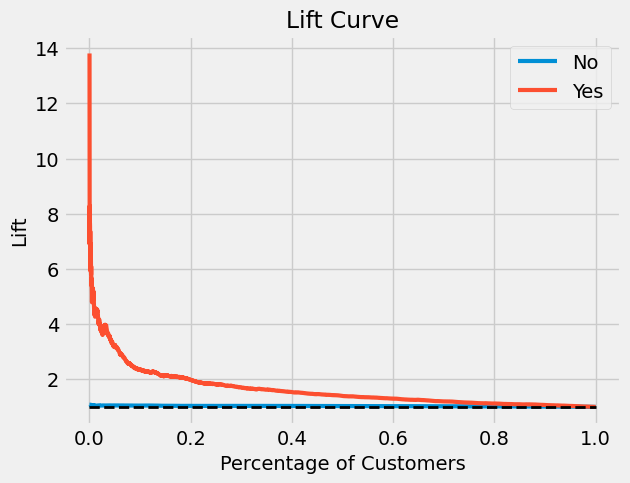

In [ ]:
skplt.metrics.plot_lift_curve(y_test, lgb.predict_proba(X_test))
plt.legend(labels=['No', 'Yes'])
plt.ylabel('Lift')
plt.xlabel('Percentage of Customers')
plt.show()